<a href="https://colab.research.google.com/github/Gilmar-PY/C8280/blob/main/13_3_Grid_Search_%2B_K_folds_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

### Obtener dataset

In [ ]:
iris = datasets.load_iris()

### Grid Search

In [ ]:
#param_grid es una lista de diccionarios

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
cantidad_de_folds=4
estimator = svm.SVC()

### Score para la evaluación

Ver más en: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

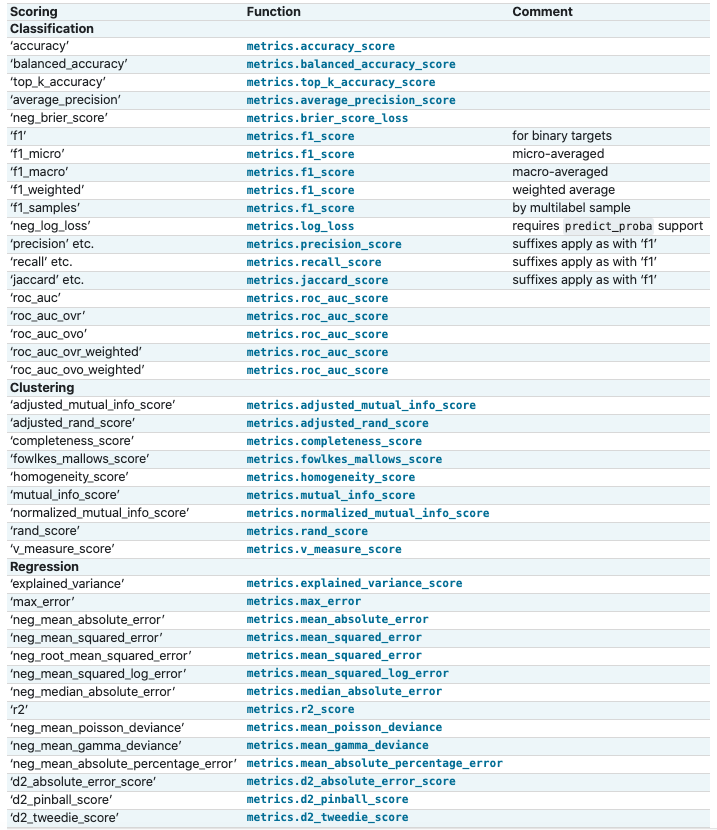

In [ ]:
clf = GridSearchCV(estimator, param_grid, cv=cantidad_de_folds, scoring='accuracy')
clf.fit(iris.data, iris.target)

### Resultados GridCV

In [ ]:
clf.cv_results_

### Espacio de búsqueda

In [ ]:
df_resultados = pd.DataFrame(clf.cv_results_['params'])
df_resultados

In [ ]:
df_resultados['mean_fit_time'] = clf.cv_results_['mean_fit_time']
df_resultados

In [ ]:
df_resultados.mean_fit_time.plot.hist(bins=4)

In [ ]:
df_resultados['std_fit_time'] = clf.cv_results_['std_fit_time']
df_resultados

In [ ]:
for i in range(cantidad_de_folds):
  df_resultados['split{}_test_score'.format(i)] = clf.cv_results_['split{}_test_score'.format(i)]
df_resultados

In [ ]:
df_resultados['mean_test_score'] = clf.cv_results_['mean_test_score']
df_resultados

In [ ]:
df_resultados['std_test_score'] = clf.cv_results_['std_test_score']
df_resultados

In [ ]:
df_resultados['rank_test_score'] = clf.cv_results_['rank_test_score']
df_resultados

In [ ]:
df_resultados.sort_values('rank_test_score')